In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer

from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.feature_selection import r_regression, SelectKBest, mutual_info_regression
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.decomposition import PCA, FastICA
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [5]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=FutureWarning)

In [154]:
# Use pandas to load in to a DataFrame
# Y1.csv doesn’t have a header s o
# add one when loading the file
X1 = pd.read_csv("data/X1.csv")
X2 = pd.read_csv("data/X2.csv")
Y1 = pd.read_csv("data/Y1.csv", header=None , names =["revenue"])

In [155]:
Y1.describe()

,revenue
count,3.540000e+03
mean,2.808340e+07
std,7.322589e+07
min,1.303869e+02
25%,4.155345e+04
50%,5.019854e+05
75%,2.144866e+07
max,8.199476e+08


In [156]:
X1

,Unnamed: 0,title,img_url,description,ratings,n_votes,is_adult,production_year,runtime,genres,release_year,studio,img_embeddings,text_embeddings
0,2502,Letters to Juliet,https://m.media-amazon.com/images/M/MV5BMjg0OT...,Letters to Juliet: Directed by Gary Winick. Wi...,6.5,92937.0,0,2010,105,"Adventure,Comedy,Drama",2010.0,Sum.,"[0.25030804, 2.4058464, 1.0431569, 0.030648155...","[-0.6795498, 0.35658365, 0.9994932, -0.9793934..."
1,6238,Veil of Tears,https://m.media-amazon.com/images/M/MV5BZjMxOD...,Veil of Tears: Directed by William Gereghty. W...,7.9,11.0,0,1996,\N,"Action,Crime,Drama",2014.0,WF,"[0.51250213, 2.8152602, 0.46308166, 0.29031387...","[-0.6202415, 0.31657028, 0.9992422, -0.9703722..."
2,1800,International Velvet,https://m.media-amazon.com/images/M/MV5BOGVkYj...,International Velvet: Directed by Bryan Forbes...,5.9,1345.0,0,1978,127,"Drama,Family,Sport",1978.0,MGM,"[0.18073043, 0.24735461, 0.63652813, 0.2496522...","[-0.709996, 0.4233521, 0.99980927, -0.98892415..."
3,2675,8 Seconds,https://m.media-amazon.com/images/M/MV5BYjY4Nz...,8 Seconds: Directed by John G. Avildsen. With ...,6.6,4851.0,0,1994,105,"Biography,Drama,Sport",1994.0,NL,"[0.025015268, 0.9105338, 0.3878257, 0.3421247,...","[-0.7416838, 0.38435012, 0.9998453, -0.9874693..."
4,3674,Penitentiary II,https://m.media-amazon.com/images/M/MV5BNjQyZW...,Penitentiary II: Directed by Jamaa Fanaka. Wit...,4.1,549.0,0,1982,108,"Crime,Drama,Sport",1982.0,MGM,"[0.19079691, 1.9068279, 0.29114372, 0.19527505...","[-0.65501904, 0.3845747, 0.9996712, -0.9766391..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,2787,Stiff Upper Lips,https://m.media-amazon.com/images/M/MV5BNGRiMz...,Stiff Upper Lips: Directed by Gary Sinyor. Wit...,6.3,973.0,0,1997,94,Comedy,1999.0,Cow.,"[0.19991912, 1.3718543, 1.1531808, 0.052152418...","[-0.55224955, 0.26953417, 0.99950045, -0.98031..."
3536,2319,Twenty Two,https://m.media-amazon.com/images/M/MV5BMjMyMz...,Twenty Two: Directed by Jack Smight. With Barb...,8.0,2190.0,0,1961,25,"Drama,Fantasy,Horror",2017.0,CL,"[0.38660493, 0.81947947, 1.9521054, 0.23831718...","[-0.52293366, 0.35181606, 0.9992165, -0.974448..."
3537,1856,Girlfight,https://m.media-amazon.com/images/M/MV5BMTMzMz...,Girlfight: Directed by Lawrence Trilling. With...,7.6,34.0,0,2001,44,"Drama,Romance",2000.0,SGem,"[0.15014637, 2.0139444, 1.0844889, 0.17270318,...","[-0.61463475, 0.4013893, 0.99981415, -0.985390..."
3538,1531,This Film Is Not Yet Rated,https://m.media-amazon.com/images/M/MV5BMTk0ND...,This Film Is Not Yet Rated: Directed by Kirby ...,7.5,27379.0,0,2006,98,Documentary,2006.0,IFC,"[0.25391683, 3.8994913, 0.23327282, 0.17322594...","[-0.74685824, 0.43955636, 0.99979496, -0.98784..."


In [157]:
print(f"Number of nan values : {X1.isnull().sum().sum()}")
X1.dtypes

Number of nan values : 0


Unnamed: 0           int64
title               object
img_url             object
description         object
ratings            float64
n_votes            float64
is_adult             int64
production_year      int64
runtime             object
genres              object
release_year       float64
studio              object
img_embeddings      object
text_embeddings     object
dtype: object

In [158]:
X1.drop(["Unnamed: 0","title", "img_url", "description"], inplace=True, axis=1)

### DEAL WITH NAN VALUES

In [159]:
print(f"Number of nan values : {X1.isnull().sum().sum()}")
#2690
#drop the 4 rows of missing values of genres
"""indexToDrop =  X1[X1["genres"] == "\\N"].index
X1 = X1.drop(indexToDrop, axis=0)  #X1 = X1.drop(indexToDrop, axis=0)
Y1 = Y1.drop(indexToDrop, axis=0)"""
X1.replace("\\N", np.nan, inplace=True)
print(f"Number of nan values : {X1.isnull().sum().sum()}")

#impute missing values with the mean for the runtime
sm_runtime = SimpleImputer(missing_values=np.nan, strategy="mean")
X1["runtime"] = sm_runtime.fit_transform(X1[["runtime"]])
print(f"Number of nan values : {X1.isnull().sum().sum()}")
#impute missing values with most frequent for the genres
#most frequent is drama
sm_genres = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
X1["genres"] = sm_genres.fit_transform(X1[["genres"]])
print(f"Number of nan values : {X1.isnull().sum().sum()}")

Number of nan values : 0
Number of nan values : 268
Number of nan values : 4
Number of nan values : 0


### CATEGORICAL FEATURES

#### Studio

In [160]:

#compute the new columns for the studio
unique_studio = np.unique(X1["studio"])

# create list with studio and nbr times named in datas
studios = []
for name_studio in unique_studio:
  index = X1["studio"] == name_studio
  studios.append((name_studio,len(X1[index])))
print(len(studios))
#before sorting the values
ordinal_encoder_bad = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X1["bad_studio_transformed"] = ordinal_encoder_bad.fit_transform(X1[["studio"]])

#after sorting the values
studios.sort(key=lambda x: x[1])
ordinal_encoder = OrdinalEncoder(categories=[[stud[0] for stud in studios]], handle_unknown='use_encoded_value', unknown_value=-1)
X1["studio_transformed"] = ordinal_encoder.fit_transform(X1[["studio"]])


498


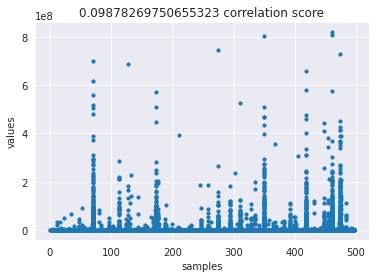

In [173]:
corr_bad = np.corrcoef(X1["bad_studio_transformed"], Y1, rowvar=False)
plt.scatter(X1["bad_studio_transformed"], Y1, s=10)
plt.xlabel("samples")
plt.ylabel("values")
plt.title(f"{corr_bad[1][0]} correlation score")
plt.savefig("./images/badCorr.pdf")

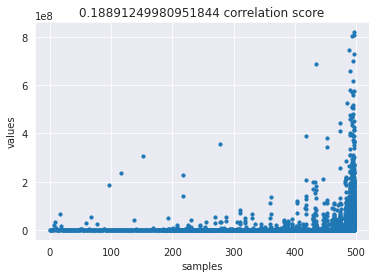

In [174]:
corr_better = np.corrcoef(X1["studio_transformed"], Y1, rowvar=False)
plt.scatter(X1["studio_transformed"], Y1, s=10)
plt.xlabel("samples")
plt.ylabel("values")
plt.title(f"{corr_better[1][0]} correlation score")
plt.savefig("./images/betterCorr.pdf")

In [ ]:
X1.drop(["studio", "bad_studio_transformed"], inplace=True, axis=1)

In [13]:
#transform genres into categorical dummies
dummies_genres = pd.get_dummies(X1["genres"].str.split(",").explode()).sum(level=0)
X1.drop("genres", axis=1, inplace=True)
X1 = pd.concat([X1, dummies_genres], axis=1)
X1

,ratings,n_votes,is_adult,production_year,runtime,release_year,img_embeddings,text_embeddings,studio_transformed,Action,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,6.5,92937.0,0,2010,105.000000,2010.0,"[0.25030804, 2.4058464, 1.0431569, 0.030648155...","[-0.6795498, 0.35658365, 0.9994932, -0.9793934...",403.0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.9,11.0,0,1996,92.293346,2014.0,"[0.51250213, 2.8152602, 0.46308166, 0.29031387...","[-0.6202415, 0.31657028, 0.9992422, -0.9703722...",296.0,1,...,0,0,0,0,0,0,0,0,0,0
2,5.9,1345.0,0,1978,127.000000,1978.0,"[0.18073043, 0.24735461, 0.63652813, 0.2496522...","[-0.709996, 0.4233521, 0.99980927, -0.98892415...",489.0,0,...,0,0,0,0,0,0,1,0,0,0
3,6.6,4851.0,0,1994,105.000000,1994.0,"[0.025015268, 0.9105338, 0.3878257, 0.3421247,...","[-0.7416838, 0.38435012, 0.9998453, -0.9874693...",486.0,0,...,0,0,0,0,0,0,1,0,0,0
4,4.1,549.0,0,1982,108.000000,1982.0,"[0.19079691, 1.9068279, 0.29114372, 0.19527505...","[-0.65501904, 0.3845747, 0.9996712, -0.9766391...",489.0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,6.3,973.0,0,1997,94.000000,1999.0,"[0.19991912, 1.3718543, 1.1531808, 0.052152418...","[-0.55224955, 0.26953417, 0.99950045, -0.98031...",425.0,0,...,0,0,0,0,0,0,0,0,0,0
3536,8.0,2190.0,0,1961,25.000000,2017.0,"[0.38660493, 0.81947947, 1.9521054, 0.23831718...","[-0.52293366, 0.35181606, 0.9992165, -0.974448...",354.0,0,...,0,0,0,0,0,0,0,0,0,0
3537,7.6,34.0,0,2001,44.000000,2000.0,"[0.15014637, 2.0139444, 1.0844889, 0.17270318,...","[-0.61463475, 0.4013893, 0.99981415, -0.985390...",464.0,0,...,0,0,0,1,0,0,0,0,0,0
3538,7.5,27379.0,0,2006,98.000000,2006.0,"[0.25391683, 3.8994913, 0.23327282, 0.17322594...","[-0.74685824, 0.43955636, 0.99979496, -0.98784...",490.0,0,...,0,0,0,0,0,0,0,0,0,0


### EMBEDDINGS

In [14]:
allImgEmbeddings = []
vectorEmbedding = []
for embedding in X1["img_embeddings"]:
    vectorEmbedding = embedding.split(sep=",")
    allImgEmbeddings.append(vectorEmbedding)

allTextEmbeddings = []
vectorEmbedding = []
for embedding in X1["text_embeddings"]:
    vectorEmbedding = embedding.split(sep=",")
    allTextEmbeddings.append(vectorEmbedding)

#transform from string to float images embbedings
for i in range(len(allImgEmbeddings)):
    allImgEmbeddings[i][0] = allImgEmbeddings[i][0][1:]
    allImgEmbeddings[i][2047] = allImgEmbeddings[i][2047][:-1]
    allImgEmbeddings[i] = list(map(float, allImgEmbeddings[i]))

#transform from string to float text embbedings
for i in range(len(allTextEmbeddings)):
    allTextEmbeddings[i][0] = allTextEmbeddings[i][0][1:]
    allTextEmbeddings[i][767] = allTextEmbeddings[i][767][:-1]
    allTextEmbeddings[i] = list(map(float, allTextEmbeddings[i]))

#transform the list of embeddings into column and concatenate them in the dataframe
allImgEmbeddingsArray = np.array(allImgEmbeddings, dtype=float)
embeddingDataframeImg = pd.DataFrame(allImgEmbeddingsArray, index=list(X1.index))

#X1["text_embeddings"] = allTextEmbeddings
allTextEmbeddingsArray = np.array(allTextEmbeddings, dtype=float)
embeddingDataframeText = pd.DataFrame(allTextEmbeddingsArray, index=list(X1.index))
X1 = pd.concat([X1, embeddingDataframeImg,embeddingDataframeText], axis=1)
X1.drop(["img_embeddings", "text_embeddings"], axis=1, inplace=True)
X1

,ratings,n_votes,is_adult,production_year,runtime,release_year,studio_transformed,Action,Adventure,Animation,...,758,759,760,761,762,763,764,765,766,767
0,6.5,92937.0,0,2010,105.000000,2010.0,403.0,0,1,0,...,0.555539,-0.173167,0.399331,-0.378869,-0.409315,-0.344284,-0.073671,0.999885,-0.495468,0.959063
1,7.9,11.0,0,1996,92.293346,2014.0,296.0,1,0,0,...,0.534597,-0.320714,0.385184,-0.552606,-0.399212,-0.445087,0.006780,0.999800,-0.508911,0.954674
2,5.9,1345.0,0,1978,127.000000,1978.0,489.0,0,0,0,...,0.697693,-0.035854,0.356325,-0.388621,-0.344016,-0.322001,-0.085762,0.999952,-0.458579,0.976136
3,6.6,4851.0,0,1994,105.000000,1994.0,486.0,0,0,0,...,0.692328,-0.009719,0.076474,-0.214084,-0.177248,0.025969,-0.112050,0.999954,-0.054416,0.977869
4,4.1,549.0,0,1982,108.000000,1982.0,489.0,0,0,0,...,0.593455,-0.336046,0.406313,-0.384353,-0.334238,-0.377167,-0.131084,0.999879,-0.166202,0.951990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,6.3,973.0,0,1997,94.000000,1999.0,425.0,0,0,0,...,0.618991,-0.185828,0.461786,-0.595909,-0.495862,-0.498804,0.012033,0.999901,-0.685967,0.966164
3536,8.0,2190.0,0,1961,25.000000,2017.0,354.0,0,0,0,...,0.372036,-0.195845,0.200071,-0.582929,-0.504679,-0.504943,-0.131687,0.999818,-0.662812,0.968601
3537,7.6,34.0,0,2001,44.000000,2000.0,464.0,0,0,0,...,0.567243,-0.106148,0.392279,-0.381554,-0.285943,-0.322065,-0.178053,0.999946,-0.321442,0.979969
3538,7.5,27379.0,0,2006,98.000000,2006.0,490.0,0,0,0,...,0.739504,-0.176527,0.220067,-0.451745,-0.179833,-0.007636,-0.181650,0.999941,-0.309001,0.972790


In [15]:
#transform the type of name of the column into str (from the embeddings)
col_to_rename = []
for col in X1.columns:
    if type(col) == int:
        col_to_rename.append(col)
X1.rename(columns= {
            i : str(i) for i in col_to_rename}, inplace=True)

### SPLIT

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.20, shuffle=True, random_state=42)

### SCORING FUNCTION

In [101]:
def compute_rmse(target, predict):
        # SOLUTION tp1
    if len(target.shape) == 2:
        target = target.squeeze()
    if len(predict.shape) == 2:
        predict = predict.squeeze()
    diff = target - predict
    if len(diff.shape) == 1:
        diff = np.expand_dims(diff, axis=-1)
    rmse = np.sqrt(diff.T@diff / diff.shape[0])
    return float(rmse)


customRMSE = make_scorer(compute_rmse, greater_is_better=False)#to use later

### BASELINE

In [102]:
def baseline(X_train, y_train, X_test, y_test):
    reg = LinearRegression().fit(X_train, y_train)
    pred = reg.predict(X_test)
    scoreRMSE = compute_rmse(y_test, pred)
    score = reg.score(X_test, y_test)
    return scoreRMSE ,score

In [103]:
scoreRMSE, score = baseline(X_train, y_train, X_test, y_test)
print(f"RMSE SCORE ={scoreRMSE}  and R² score={score}")

RMSE SCORE =312353224.6188579  and R² score=-13.161765966097482


In [104]:
def modelEvalutation(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scoreRMSE = compute_rmse(y_test, pred)
    score = model.score(X_test, y_test)
    return scoreRMSE, score

### OUTLIER REMOVAL

In [105]:
import plotly.express as pe
cols = ['ratings', 'n_votes', 'is_adult', 'production_year', 'runtime',
       'release_year']
for col in cols:
  fig = pe.box(X_train, y=col)
  fig.show()

In [106]:
X_train.drop(['is_adult'], axis=1, inplace=True)
X_test.drop(["is_adult"], axis=1, inplace=True)

In [107]:
def find_outliers_IQR(df):
   q1=df.quantile(0.05)
   q3=df.quantile(0.95)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [108]:
def drop_outliers_IQR(df):

   q1=df.quantile(0.05)
   q3=df.quantile(0.95)
   IQR=q3-q1
   not_outliers = X_train[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   outliers_dropped = find_outliers_IQR(df)

   return outliers_dropped, not_outliers

In [109]:
cols = ['ratings', 'n_votes', 'production_year', 'runtime',
       'release_year']
for col in cols:
  outliers = find_outliers_IQR(X_train[col])
  print("number of outliers "+ col + ": " + str(len(outliers)))
  print("max outlier value "+ col + ": " +  str(outliers.max()))
  print("min outlier value "+ col + ": " + str(outliers.min()))
  print("\n")

number of outliers ratings: 0
max outlier value ratings: nan
min outlier value ratings: nan


number of outliers n_votes: 40
max outlier value n_votes: 2332286.0
min outlier value n_votes: 273256.0


number of outliers production_year: 2
max outlier value production_year: 1917
min outlier value production_year: 1916


number of outliers runtime: 3
max outlier value runtime: 566.0
min outlier value runtime: 284.0


number of outliers release_year: 0
max outlier value release_year: nan
min outlier value release_year: nan




In [110]:
#remove outliers
cols = ['ratings', 'n_votes', 'production_year', 'runtime',
       'release_year']
X_train = pd.concat([X_train,y_train], axis=1)
for col in cols:
  outliers_dropped, X_train = drop_outliers_IQR(X_train[col])
X_train.index = range(len(X_train))
y_train = X_train['revenue']
y_train.index = range(len(y_train))
X_train = X_train.drop(columns =['revenue'])

In [111]:
scoreRMSE, score = baseline(X_train, y_train, X_test, y_test)
print(f"RMSE SCORE ={scoreRMSE} and R² score={score} ")

RMSE SCORE =270166902.81862736 and R² score=-9.59472561269598 


### SCALE

In [112]:
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
scaledX_train = scaler_X.fit_transform(X_train)
scaledX_train = pd.DataFrame(data=scaledX_train,columns=X_train.columns)

scaledX_test = scaler_X.transform(X_test)
scaledX_test = pd.DataFrame(data=scaledX_test,columns=X_test.columns)

y_train2 = y_train.values.reshape(-1,1)
y_test2 = y_test.values.reshape(-1,1)

scaledY_train = scaler_Y.fit_transform(y_train2)
scaledY_train = pd.DataFrame(data=scaledY_train)

scaledY_test = scaler_Y.fit_transform(y_test2)
scaledY_test = pd.DataFrame(data=scaledY_test)

Text(0, 0.5, 'count')

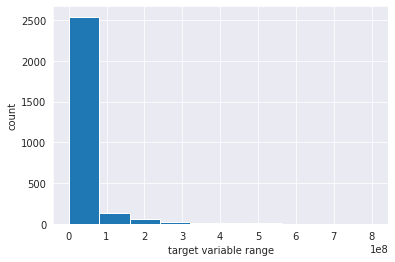

In [113]:
plt.hist(y_train2)
plt.xlabel("target variable range")
plt.ylabel("count")
#plt.savefig("./images/distribution_y.pdf")

Text(0, 0.5, 'count')

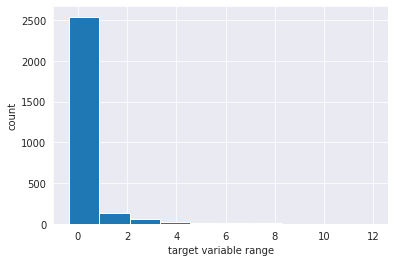

In [114]:
plt.hist(scaledY_train)
plt.xlabel("target variable range")
plt.ylabel("count")
#plt.savefig("./images/scaled_y.pdf")

In [115]:
scoreRMSE, score = baseline(scaledX_train, scaledY_train, scaledX_test, scaledY_test)
print(f"RMSE SCORE ={scoreRMSE} and R² score={score}")

RMSE SCORE =2.7528070559677653 and R² score=-6.577946687385912


In [116]:
#Xtrain and Xtest are scaled with StandardScaler since it give slightly better result
X_train = scaledX_train
X_test = scaledX_test
y_train = scaledY_train
y_train = y_train.values.reshape((y_train.shape[0],))
y_test = scaledY_test

### MODELS

In [117]:
#dict of param used later for tuning the hyper parameters
paramRFR = {
    'n_estimators' : [10, 25, 50, 75, 100, 150, 200, 250],
    'max_features' : [1.0, "sqrt", None], #1.0 = "auto"
    "max_depth" : [10, 50, 100, None],
    "bootstrap" : [True, False]
}
paramKneighbors = {
    "n_neighbors" : [5, 10, 20, 50, 75, 100, 150, 200, 250],
    "weights" : ["uniform", "distance"],
    "p" : [1, 2, 100] #1 = manhattan distance, 2= euclidean distance #Minkowski distances
}
param_MLP = {
    "hidden_layer_sizes" : [10, 50, 100, 200],
    "max_iter"           : [100, 200, 1000, 2500, 5000],
    "activation"         : ['identity', 'logistic', 'tanh', 'relu'],
    "solver"             : ['lbfgs', 'sgd', 'adam']
}

models = {
    #                      model   /    dict_param
    "linear_regression" : (LinearRegression(), {}, 0),
    "KNN"               : (KNeighborsRegressor(), paramKneighbors, 0),
    "random_forest"     : (RandomForestRegressor(random_state=42), paramRFR, 0),
    "MLP"               : (MLPRegressor(random_state=42), param_MLP, 0)
}

### FEATURE SELECTION

#### PCA-ICA

In [34]:
#X1.index = range(len(X1))
#Y1.index = range(len(Y1))
to_drop_num = ['ratings', 'n_votes', 'production_year', 'runtime','release_year', 'studio_transformed', 'Action', 'Adventure', 'Animation','Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family','Fantasy', 'Film-Noir', 'Game-Show', 'History','Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV','Romance', 'Sci-Fi', 'Short', 'Sport','Thriller', 'War', 'Western']

X_num_train = X_train.copy()
X_other_train = X_train[to_drop_num]
X_num_train.drop(to_drop_num, axis=1, inplace=True)

X_num_test = X_test.copy()
X_other_test = X_test[to_drop_num]
X_num_test.drop(to_drop_num, axis=1, inplace=True)

pca = PCA(n_components=0.90, svd_solver = "full")
Xpca_train = pca.fit_transform(X_num_train)
Xpca_test = pca.transform(X_num_test)

ica = FastICA(whiten="arbitrary-variance")
Xica_train = ica.fit_transform(Xpca_train)  # Estimate the sources
Xica_test = ica.transform(Xpca_test)

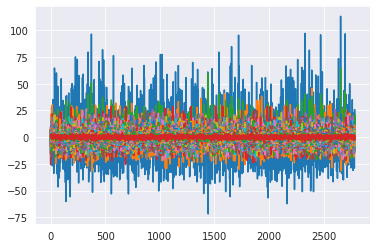

In [35]:
plt.figure()
plt.plot(Xpca_train)

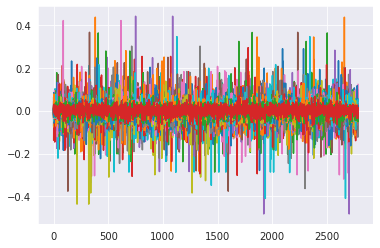

In [36]:
plt.figure()
plt.plot(Xica_train)

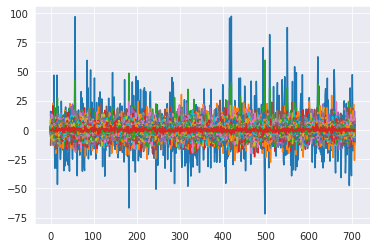

In [37]:
plt.figure()
plt.plot(Xpca_test)

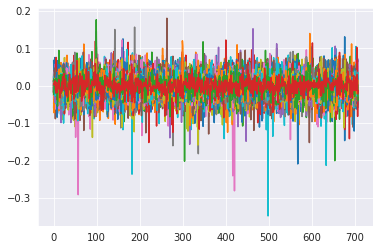

In [38]:
plt.figure()
plt.plot(Xica_test)

In [39]:
X_train_ica = pd.concat([X_other_train, pd.DataFrame(Xica_train)], axis=1)
X_test_ica = pd.concat([X_other_test, pd.DataFrame(Xica_test)], axis=1)

In [40]:
#drop features that are correlated
matrix_corr = X_train.corr().abs()

#select upper triangle of correlation matrix
upper_triangle = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(bool))

#find index of feature columns with correlation greater than 0.95
to_drop = [feature for feature in upper_triangle.columns if any(upper_triangle[feature] > 0.99)]
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)

In [41]:
def select_features_Correlation(X_train, y_train, X_test, n_feat):
    ###################
    # INSERT CODE HERE
    ##################
    ## TODO: Return X_train_filtered, X_test_filtered such that they only contain the n_feats
    ##       that are the most correlated to the target

    select_n_best_correlation = SelectKBest(r_regression, k=n_feat)
    X_train_filtered = select_n_best_correlation.fit_transform(X_train, y_train)
    X_test_filtered = select_n_best_correlation.transform(X_test)
    selectedColumns = select_n_best_correlation.get_feature_names_out(X_train.columns) #get name of the columns we kept
    return X_train_filtered, X_test_filtered, selectedColumns

In [42]:
def select_features_MI(X_train, Y_train, X_test, n_feat):
    ###################
    # INSERT CODE HERE
    ###################
    ## TODO: Return X_train_filtered, X_test_filtered such that they only contain the n_feats
    ##       that are have most mutual information with target

    select_n_best_mutual = SelectKBest(mutual_info_regression, k=n_feat)
    X_train_filtered = select_n_best_mutual.fit_transform(X_train, Y_train)
    X_test_filtered = select_n_best_mutual.transform(X_test)
    selectedColumns = select_n_best_mutual.get_feature_names_out(X_train.columns) #get name of the columns we kept

    return X_train_filtered, X_test_filtered, selectedColumns

### CROSS VALIDATION

In [43]:

kF = KFold(n_splits=5, random_state=42, shuffle=True)
def run_kfold(kf, model, X_train_filtered, y_train):

    actual_score = []

    for train_index, test_index in kf.split(X_train_filtered):

        Xtrain, Xtest = X_train_filtered[train_index], X_train_filtered[test_index]
        y_train_train, y_test = y_train[train_index], y_train[test_index]
        model.fit(Xtrain, y_train_train)
        pred = model.predict(Xtest)
        actual_score.append(compute_rmse(y_test, pred))

    return (actual_score, pred)


In [44]:
def get_best_n_feats(results_feature_selection):
    list_best_index = []
    for model_name, results in results_feature_selection.items():
        #print(results)
        best_result_index = np.argmin(results)
        list_best_index.append(best_result_index)
    return list_best_index

In [45]:
results_feature_correlation = {
    "linear_regression" : [],
    "KNN"               : [],
    "random_forest"     : [],
    "MLP"               : []
}
n_features_list = [5, 10, 15, 20, 50, 100, 250]
for name, model in models.items():
    for n_features in n_features_list:
        print(f'----------- n features: {n_features} ---------------------')
        X_train_filtered_correlation, X_test_filtered_correlation, col_selected_correlation = select_features_Correlation(X_train, y_train, X_test , n_features)
        score = run_kfold(kF, model[0], X_train_filtered_correlation, y_train)
        results_feature_correlation[name].append(np.mean(score[0]))
        print(f'# {name} has a score of {np.mean(score[0])} and std of {np.std(score[0])}')
        print()

----------- n features: 5 ---------------------
# linear_regression has a score of 0.8926023635409027 and std of 0.08481436037928326

----------- n features: 10 ---------------------
# linear_regression has a score of 0.8846778337301989 and std of 0.09131693155320977

----------- n features: 15 ---------------------
# linear_regression has a score of 0.8841536895079404 and std of 0.09029599338793501

----------- n features: 20 ---------------------
# linear_regression has a score of 0.8866772796045943 and std of 0.08928344330759691

----------- n features: 50 ---------------------
# linear_regression has a score of 0.8940482884237383 and std of 0.09254525335806155

----------- n features: 100 ---------------------
# linear_regression has a score of 0.9037354963884783 and std of 0.09081581147992587

----------- n features: 250 ---------------------
# linear_regression has a score of 0.947269849039422 and std of 0.0908479724680849

----------- n features: 5 ---------------------
# KNN ha

In [46]:
best_n_feats_correlation = get_best_n_feats(results_feature_correlation)
best_n_feats_correlation #index of the list n_features_list

[2, 1, 4, 0]

In [47]:
results_mutual_information = {
    "linear_regression" : [],
    "KNN"               : [],
    "random_forest"     : [],
    "MLP"               : []
}
names_mutual = []
for name, model in models.items():
    for n_features in n_features_list:
        print(f'----------- n features: {n_features} ---------------------')
        X_train_filtered_MI, X_test_filtered_MI, col_selected_MI = select_features_MI(X_train, y_train, X_test , n_features)
        score = run_kfold(kF, model[0], X_train_filtered_MI, y_train)
        results_mutual_information[name].append(np.mean(score[0]))
        names_mutual.append(name)
        print(f'# {name} has a score of {np.mean(score[0])} and std of {np.std(score[0])}')
        print()

----------- n features: 5 ---------------------
# linear_regression has a score of 0.8977802150529015 and std of 0.09513567912306595

----------- n features: 10 ---------------------
# linear_regression has a score of 0.8964391069503812 and std of 0.09426951589388659

----------- n features: 15 ---------------------
# linear_regression has a score of 0.894405836704437 and std of 0.09525413840315487

----------- n features: 20 ---------------------
# linear_regression has a score of 0.8940768759047932 and std of 0.09736741059705639

----------- n features: 50 ---------------------
# linear_regression has a score of 0.8943518394311912 and std of 0.09396226918824538

----------- n features: 100 ---------------------
# linear_regression has a score of 0.9095393199775088 and std of 0.0940860041126894

----------- n features: 250 ---------------------
# linear_regression has a score of 0.9428395222551362 and std of 0.09101074976352623

----------- n features: 5 ---------------------
# KNN ha

In [48]:
best_n_feats_mi = get_best_n_feats(results_mutual_information)#index of the list n_features_list
print(n_features_list)
print(best_n_feats_correlation)
print(best_n_feats_mi)

[5, 10, 15, 20, 50, 100, 250]
[2, 1, 4, 0]
[3, 0, 0, 0]


In [49]:
results_feature_selection = {
    "linear_regression" : [],
    "KNN"               : [],
    "random_forest"     : [],
    "MLP"               : []
}
n_features_list = [5, 10, 15, 20, 50, 100, 250]
for name, model in models.items():
    for n_features in n_features_list:
        print(f'----------- n features: {n_features} ---------------------')
        X_train_filtered_correlation, X_test_filtered_correlation, col_selected_correlation = select_features_Correlation(X_train, y_train, X_test , n_features)
        X_train_filtered_MI, X_test_filtered_MI, col_selected_MI = select_features_MI(X_train, y_train, X_test , n_features)

        X_train_filtered_correlation = pd.DataFrame(X_train_filtered_correlation, columns=col_selected_correlation)
        X_train_filtered_MI = pd.DataFrame(X_train_filtered_MI, columns=col_selected_MI)
        X_test_filtered_correlation = pd.DataFrame(X_test_filtered_correlation, columns=col_selected_correlation)
        X_test_filtered_MI = pd.DataFrame(X_test_filtered_MI, columns=col_selected_MI)

        to_drop = []
        for col in X_train_filtered_MI.columns:
            if col in X_train_filtered_correlation.columns:
                to_drop.append(col)
        X_train_filtered_MI.drop(to_drop, axis=1, inplace=True)
        X_test_filtered_MI.drop(to_drop, axis=1, inplace=True)

        X_train_filtered = pd.concat([X_train_filtered_correlation, X_train_filtered_MI], axis=1)
        X_test_filtered = pd.concat([X_test_filtered_correlation, X_test_filtered_MI], axis=1)
        combined_n_feats = X_train_filtered.shape[1]
        print(f"number of combined features= {combined_n_feats}")
        score = run_kfold(kF, model[0], X_train_filtered.to_numpy(), y_train)
        results_feature_selection[name].append(np.mean(score[0]))
        print(f'# {name} has a score of {np.mean(score[0])} and std of {np.std(score[0])}')
        print()

----------- n features: 5 ---------------------
number of combined features= 8
# linear_regression has a score of 0.8786740987220811 and std of 0.08505124000147597

----------- n features: 10 ---------------------
number of combined features= 18
# linear_regression has a score of 0.8657913990009887 and std of 0.09396895618767044

----------- n features: 15 ---------------------
number of combined features= 28
# linear_regression has a score of 0.8647893998765654 and std of 0.09345043623355556

----------- n features: 20 ---------------------
number of combined features= 38
# linear_regression has a score of 0.8660497649085711 and std of 0.09078709100099377

----------- n features: 50 ---------------------
number of combined features= 95
# linear_regression has a score of 0.879090613242775 and std of 0.09019334110575652

----------- n features: 100 ---------------------
number of combined features= 188
# linear_regression has a score of 0.9019431492909449 and std of 0.08772875356419

--

In [145]:
#Make the graph for features selection on a rfr
results_mi = []
results_corr = []
results_combined = []
name_graph = []

n = 20
print(f'----------- n features: {n} ---------------------')
X_train_filtered_MI, X_test_filtered_MI, col_selected_MI = select_features_MI(X_train, y_train, X_test , n)
score_mi = run_kfold(kF, models["random_forest"][0], X_train_filtered_MI, y_train)
results_mi.append(score_mi[0])

X_train_filtered_correlation, X_test_filtered_correlation, col_selected_correlation = select_features_Correlation(X_train, y_train, X_test , n)
score_corr = run_kfold(kF, models["random_forest"][0], X_train_filtered_correlation, y_train)
results_corr.append(score_corr[0])

X_train_filtered_correlation = pd.DataFrame(X_train_filtered_correlation, columns=col_selected_correlation)
X_train_filtered_MI = pd.DataFrame(X_train_filtered_MI, columns=col_selected_MI)
X_test_filtered_correlation = pd.DataFrame(X_test_filtered_correlation, columns=col_selected_correlation)
X_test_filtered_MI = pd.DataFrame(X_test_filtered_MI, columns=col_selected_MI)

to_drop = []
for col in X_train_filtered_MI.columns:
    if col in X_train_filtered_correlation.columns:
        to_drop.append(col)
X_train_filtered_MI.drop(to_drop, axis=1, inplace=True)
X_test_filtered_MI.drop(to_drop, axis=1, inplace=True)

X_train_filtered = pd.concat([X_train_filtered_correlation, X_train_filtered_MI], axis=1)
X_test_filtered = pd.concat([X_test_filtered_correlation, X_test_filtered_MI], axis=1)
combined_n_feats = X_train_filtered.shape[1]
print(f"number of combined features= {combined_n_feats}")
score_combined = run_kfold(kF,models["random_forest"][0], X_train_filtered.to_numpy(), y_train)
results_combined.append(score_combined[0])

print()

----------- n features: 20 ---------------------
number of combined features= 38



In [149]:
results_all = [results_mi[0], results_corr[0], results_combined[0]]

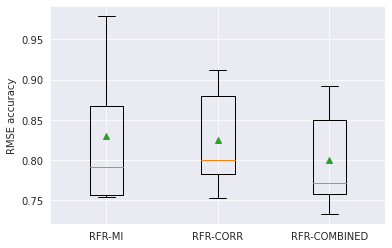

In [153]:
plt.boxplot(results_all, labels=["RFR-MI", "RFR-CORR", "RFR-COMBINED"], showmeans=True)
plt.ylabel("RMSE accuracy")
plt.savefig('./images/featuresSelection.pdf')

In [50]:
n_features_list_combined = [8, 18, 28, 38, 95, 188]
best_feat_selected = get_best_n_feats(results_feature_selection)
best_feat_selected

[2, 1, 0, 1]

In [51]:

for name, model in models.items():
    n_features  = 15
    print(f'----------- n features: {n_features} ---------------------')
    X_train_filtered_correlation, X_test_filtered_correlation, col_selected_correlation = select_features_Correlation(X_train, y_train, X_test , n_features)
    X_train_filtered_MI, X_test_filtered_MI, col_selected_MI = select_features_MI(X_train, y_train, X_test , n_features)

    X_train_filtered_correlation = pd.DataFrame(X_train_filtered_correlation, columns=col_selected_correlation)
    X_train_filtered_MI = pd.DataFrame(X_train_filtered_MI, columns=col_selected_MI)
    X_test_filtered_correlation = pd.DataFrame(X_test_filtered_correlation, columns=col_selected_correlation)
    X_test_filtered_MI = pd.DataFrame(X_test_filtered_MI, columns=col_selected_MI)

    to_drop = []
    for col in X_train_filtered_MI.columns:
        if col in X_train_filtered_correlation.columns:
            to_drop.append(col)
    X_train_filtered_MI.drop(to_drop, axis=1, inplace=True)
    X_test_filtered_MI.drop(to_drop, axis=1, inplace=True)

    X_train_filtered = pd.concat([X_train_filtered_correlation, X_train_filtered_MI], axis=1)
    X_test_filtered = pd.concat([X_test_filtered_correlation, X_test_filtered_MI], axis=1)


----------- n features: 15 ---------------------
----------- n features: 15 ---------------------
----------- n features: 15 ---------------------
----------- n features: 15 ---------------------


In [52]:
print(X_train_filtered.columns)

Index(['n_votes', 'studio_transformed', 'Action', 'Adventure', 'Family',
       'Short', '983', '998', '1466', '1494', '1522', '1566', '1637', '1845',
       '1874', 'ratings', 'production_year', 'runtime', 'release_year', '950',
       '962', '1073', '1340', '1369', '1591', '1640', '1821', '1846'],
      dtype='object')


In [53]:
n_features_list[best_feat_selected[3]]
X_train_filtered.iloc[::, :n_features_list_combined[best_feat_selected[2]]]

,n_votes,studio_transformed,Action,Adventure,Family,Short,983,998
0,-0.389823,0.630664,2.442847,-0.36206,3.635848,-0.147063,-0.836270,0.782412
1,-0.389742,0.621225,2.442847,-0.36206,-0.275039,-0.147063,-0.367332,-0.354187
2,-0.018352,0.649541,-0.409358,-0.36206,-0.275039,-0.147063,-0.763979,-0.564293
3,-0.388309,0.630664,-0.409358,-0.36206,-0.275039,-0.147063,-0.195419,-0.163176
4,-0.389823,-0.615234,-0.409358,-0.36206,-0.275039,-0.147063,-0.238272,0.315765
...,...,...,...,...,...,...,...,...
2782,-0.389525,0.602348,-0.409358,-0.36206,-0.275039,-0.147063,-0.539012,1.315938
2783,-0.383849,-0.398146,-0.409358,-0.36206,-0.275039,-0.147063,0.631788,-0.801735
2784,-0.378957,-0.747375,-0.409358,-0.36206,-0.275039,-0.147063,0.162380,0.283076
2785,0.232953,0.640102,2.442847,-0.36206,-0.275039,-0.147063,0.373191,0.000042


In [54]:
#add the specif features to a model
cnt = 0
for i in models.keys():
    models[i] = list(models[i])
    models[i][2] = X_train_filtered.iloc[::, :n_features_list_combined[best_feat_selected[cnt]]] #[:, 0:n_features_list[best_feat_selected[cnt]]]
    models[i] = tuple(models[i])
    cnt +=1


In [58]:
## do cross validation on all the models

In [59]:

results = []
pred = []
names = []
for name, model in models.items():
    X_train = model[2]
    scores = run_kfold(kF, model[0], X_train.to_numpy(), y_train)
    results.append(scores[0])
    pred.append(score[1])
    names.append(name)
    print(f"{name} score = {np.mean(scores[0])} and std = {np.std(score[0])} ")

linear_regression score = 0.8647893998765654 and std = 0.07024670989097252 
KNN score = 0.9062726984168862 and std = 0.07024670989097252 
random_forest score = 0.8513392996983932 and std = 0.07024670989097252 
MLP score = 0.8612517788496339 and std = 0.07024670989097252 


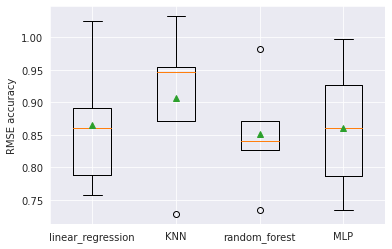

In [80]:
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel("RMSE accuracy")
plt.savefig("./images/modelComparisonBeforeGrid.pdf")

### HYPER PARAMETER TUNING

In [61]:

def performGridSearch(model, paramGrid, X_train, y_train):
    gridSearchCv = GridSearchCV(estimator=model, param_grid=paramGrid, scoring=customRMSE, cv=kF,verbose=1, n_jobs=-2)
    gridSearchCv.fit(X_train, y_train)
    return gridSearchCv

def evaluate(model, X_test, y_test):
    score = model.score(X_test, y_test)
    pred = model.predict(X_test)
    rmse = compute_rmse(y_test, pred)
    return (rmse, score, pred)

In [62]:
results_grid = []
best_models = []
names_best = []
for name, model in models.items():
    X_train = model[2]
    grid = performGridSearch(model[0], model[1], X_train, y_train)
    results_grid.append(grid.best_score_)
    best_models.append((grid.best_estimator_, grid.best_params_))
    names_best.append(name)
    print(f"{name} best score = {grid.best_score_} and parameters = {grid.best_params_} ")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
linear_regression best score = -0.8647893998765654 and parameters = {} 
Fitting 5 folds for each of 54 candidates, totalling 270 fits
KNN best score = -0.840956113235577 and parameters = {'n_neighbors': 10, 'p': 1, 'weights': 'distance'} 
Fitting 5 folds for each of 192 candidates, totalling 960 fits
random_forest best score = -0.8168863053667106 and parameters = {'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 150} 
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


/home/vinc/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vinc/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vinc/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP

MLP best score = -0.8329384036362679 and parameters = {'activation': 'tanh', 'hidden_layer_sizes': 200, 'max_iter': 100, 'solver': 'adam'} 


In [63]:
results_after_tuning = []
pred_after_tuning = []
names_after_tuning= []
i = 0
for name, model in models.items():
    X_train = model[2]
    model[0].set_params(**best_models[i][1])
    #print(model[0].get_params())
    scores = run_kfold(kF, model[0], X_train.to_numpy(), y_train)
    results_after_tuning.append(scores[0])
    pred_after_tuning.append(score[1])
    names_after_tuning.append(name)
    print(f"{name} score = {np.mean(scores[0])} and std = {np.std(score[0])} ")
    i +=1

linear_regression score = 0.8647893998765654 and std = 0.07024670989097252 
KNN score = 0.840956113235577 and std = 0.07024670989097252 
random_forest score = 0.8168863053667106 and std = 0.07024670989097252 
MLP score = 0.8329384036362679 and std = 0.07024670989097252 


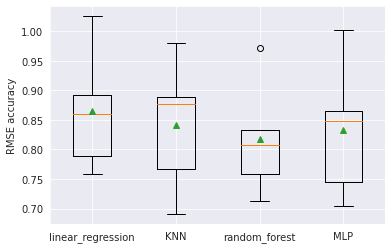

In [81]:
plt.boxplot(results_after_tuning, labels=names_after_tuning, showmeans=True)
plt.ylabel("RMSE accuracy")
plt.savefig("./images/modelComparisonAfterGrid.pdf")

### Evaluation of the best model

In [65]:
the_best_model = models["random_forest"][0]
the_best_model

RandomForestRegressor(max_depth=50, max_features='sqrt', n_estimators=150,
                      random_state=42)

In [98]:
pred_test = the_best_model.predict(X_test_filtered[models["random_forest"][2].columns])
testY = scaler_Y.inverse_transform(pred_test.reshape((-1, 1)))
RMSE = compute_rmse(y_test2, testY) #RMSE in Y2
print(RMSE)

71490038.84454308


/home/vinc/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



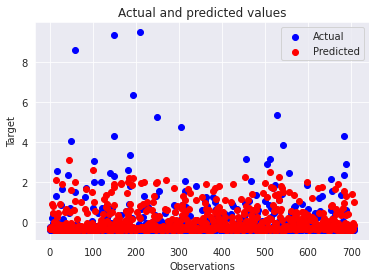

In [83]:
fig, ax = plt.subplots()
ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual')
ax.scatter(x = range(0, pred_test.size), y=pred_test, c = 'red', label = 'Predicted')
plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Target')
plt.legend()
plt.savefig("./images/actualVSpredicted.pdf")
plt.show()

### Preprocessing of X2

In [68]:
X2.drop(["Unnamed: 0","title", "img_url", "description", "is_adult"], inplace=True, axis=1)

In [69]:
print(f"Number of nan values : {X2.isnull().sum().sum()}")

#drop the 4 rows of missing values of genres
"""indexToDrop =  X2[X2["genres"] == "\\N"].index
X1 = X1.drop(indexToDrop, axis=0)  #X1 = X1.drop(indexToDrop, axis=0)
Y1 = Y1.drop(indexToDrop, axis=0)"""
X2.replace("\\N", np.nan, inplace=True)
print(f"Number of nan values : {X2.isnull().sum().sum()}")
print(X2.isnull().sum())

#impute missing values with the mean for the runtime
X2["runtime"] = sm_runtime.transform(X2[["runtime"]])
print(f"Number of nan values : {X2.isnull().sum().sum()}")
#impute missing values with most frequent for the genres
#most frequent is drama
X2["genres"] = sm_genres.transform(X2[["genres"]])
print(f"Number of nan values : {X2.isnull().sum().sum()}")

Number of nan values : 0
Number of nan values : 110
ratings              0
n_votes              0
production_year      0
runtime            106
genres               4
release_year         0
studio               0
img_embeddings       0
text_embeddings      0
dtype: int64
Number of nan values : 4
Number of nan values : 0


In [70]:
X2["studio_transformed"] = ordinal_encoder.transform(X2[["studio"]])
X2.drop(["studio"], inplace=True, axis=1)

In [71]:
#transform genres into categorical dummies
dummies_genres_X2 = pd.get_dummies(X2["genres"].str.split(",").explode()).sum(level=0)
X2.drop("genres", axis=1, inplace=True)
X2 = pd.concat([X2, dummies_genres_X2], axis=1)
X2

,ratings,n_votes,production_year,runtime,release_year,img_embeddings,text_embeddings,studio_transformed,Action,Adventure,...,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,7.5,24256.0,2003,106.0,2003.0,"[0.2698399, 3.1845033, 0.13669977, 0.14299123,...","[-0.62699246, 0.3949766, 0.9997058, -0.9845231...",487.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.9,48.0,1964,11.0,2017.0,"[0.4279979, 0.82890534, 1.0090543, 0.17800629,...","[-0.78522605, 0.46340582, 0.9999196, -0.991904...",418.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,6.3,6.0,1957,30.0,2009.0,"[0.3227182, 4.6717577, 0.24727274, 0.30942556,...","[-0.51733744, 0.3527469, 0.9993828, -0.9729327...",480.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.9,80.0,1972,60.0,2004.0,"[0.011863205, 1.0377717, 0.6964849, 0.27411973...","[-0.52853703, 0.24114524, 0.998973, -0.9659761...",495.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5.8,1359.0,1994,105.0,1994.0,"[0.18395236, 2.0983813, 0.29292667, 0.59968936...","[-0.6487137, 0.4033376, 0.999519, -0.97546834,...",451.0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,5.2,503.0,1987,86.0,1988.0,"[0.6907283, 1.729979, 0.55596817, 0.27663177, ...","[-0.7183374, 0.38522938, 0.9998054, -0.9850116...",474.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1514,8.2,12.0,1967,60.0,2016.0,"[0.032674238, 1.3305097, 0.5538778, 0.22841696...","[-0.48803085, 0.2479086, 0.99892545, -0.969775...",419.0,0,0,...,0,1,0,0,0,0,0,0,0,0
1515,6.5,8496.0,1999,96.0,1999.0,"[0.5881883, 2.1023622, 0.56811166, 0.4214271, ...","[-0.60516053, 0.32674095, 0.9993118, -0.975308...",492.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1516,6.6,78189.0,2000,116.0,2000.0,"[0.6784923, 3.2537642, 0.07126416, 0.4950616, ...","[-0.6654562, 0.32529247, 0.9996618, -0.9790677...",496.0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [72]:
allImgEmbeddings = []
vectorEmbedding = []
for embedding in X2["img_embeddings"]:
    vectorEmbedding = embedding.split(sep=",")
    allImgEmbeddings.append(vectorEmbedding)

allTextEmbeddings = []
vectorEmbedding = []
for embedding in X2["text_embeddings"]:
    vectorEmbedding = embedding.split(sep=",")
    allTextEmbeddings.append(vectorEmbedding)

#transform from string to float images embbedings
for i in range(len(allImgEmbeddings)):
    allImgEmbeddings[i][0] = allImgEmbeddings[i][0][1:]
    allImgEmbeddings[i][2047] = allImgEmbeddings[i][2047][:-1]
    allImgEmbeddings[i] = list(map(float, allImgEmbeddings[i]))

#transform from string to float text embbedings
for i in range(len(allTextEmbeddings)):
    allTextEmbeddings[i][0] = allTextEmbeddings[i][0][1:]
    allTextEmbeddings[i][767] = allTextEmbeddings[i][767][:-1]
    allTextEmbeddings[i] = list(map(float, allTextEmbeddings[i]))

#transform the list of embeddings into column and concatenate them in the dataframe
allImgEmbeddingsArray = np.array(allImgEmbeddings, dtype=float)
embeddingDataframeImg = pd.DataFrame(allImgEmbeddingsArray, index=list(X2.index))

#X1["text_embeddings"] = allTextEmbeddings
allTextEmbeddingsArray = np.array(allTextEmbeddings, dtype=float)
embeddingDataframeText = pd.DataFrame(allTextEmbeddingsArray, index=list(X2.index))
X2 = pd.concat([X2, embeddingDataframeImg,embeddingDataframeText], axis=1)
X2.drop(["img_embeddings", "text_embeddings"], axis=1, inplace=True)
X2

,ratings,n_votes,production_year,runtime,release_year,studio_transformed,Action,Adventure,Animation,Biography,...,758,759,760,761,762,763,764,765,766,767
0,7.5,24256.0,2003,106.0,2003.0,487.0,0,0,0,0,...,0.663820,-0.091275,0.457304,-0.391982,-0.397648,-0.350135,-0.076778,0.999912,-0.499187,0.972007
1,5.9,48.0,1964,11.0,2017.0,418.0,0,0,0,0,...,0.751991,0.104360,0.117178,-0.165869,-0.142738,0.049725,-0.263748,0.999960,-0.219024,0.981100
2,6.3,6.0,1957,30.0,2009.0,480.0,0,0,0,0,...,0.551550,-0.417442,0.580056,-0.656573,-0.472116,-0.505535,-0.086493,0.999815,-0.679789,0.965875
3,7.9,80.0,1972,60.0,2004.0,495.0,0,0,0,0,...,0.450442,-0.254761,0.560075,-0.624198,-0.503023,-0.568241,-0.025172,0.999743,-0.610655,0.932034
4,5.8,1359.0,1994,105.0,1994.0,451.0,0,0,0,1,...,0.516519,-0.050863,0.269495,-0.467202,-0.391554,-0.509108,-0.164548,0.999884,-0.521062,0.967667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,5.2,503.0,1987,86.0,1988.0,474.0,0,0,0,0,...,0.725646,-0.181543,0.324597,-0.368293,-0.261999,-0.270244,-0.077261,0.999941,-0.475095,0.974942
1514,8.2,12.0,1967,60.0,2016.0,419.0,0,0,0,0,...,0.287846,-0.043471,0.429989,-0.613383,-0.500355,-0.560215,0.067080,0.999768,-0.631706,0.958218
1515,6.5,8496.0,1999,96.0,1999.0,492.0,0,0,0,0,...,0.590525,-0.155928,0.517510,-0.504115,-0.373361,-0.600137,0.042660,0.999775,-0.688835,0.951131
1516,6.6,78189.0,2000,116.0,2000.0,496.0,1,0,0,0,...,0.623298,-0.254495,0.220841,-0.463458,-0.381763,-0.310506,-0.065750,0.999919,-0.236027,0.966144


In [73]:
#Film-Noir, News
X2["Film-Noir"] = 0
X2["News"] = 0
X2 = scaler_X.transform(X2)

/home/vinc/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [74]:
X2 = pd.DataFrame(X2, columns=scaler_X.get_feature_names_out())
X2 = X2[models["random_forest"][2].columns]
X2

,n_votes,studio_transformed,Action,Adventure,Family,Short,983,998
0,0.265576,0.583470,-0.409358,-0.36206,-0.275039,-0.147063,3.411130,0.664582
1,-0.388714,-0.067794,-0.409358,-0.36206,-0.275039,-0.147063,-0.457651,1.077700
2,-0.389850,0.517400,-0.409358,-0.36206,-0.275039,-0.147063,-0.723253,1.928320
3,-0.387850,0.658979,-0.409358,-0.36206,-0.275039,-0.147063,-0.512732,0.906082
4,-0.353281,0.243680,-0.409358,-0.36206,-0.275039,-0.147063,-0.624683,1.212438
...,...,...,...,...,...,...,...,...
1513,-0.376417,0.460768,-0.409358,-0.36206,-0.275039,-0.147063,-0.387133,-0.393894
1514,-0.389687,-0.058356,-0.409358,-0.36206,-0.275039,-0.147063,2.781965,-0.479969
1515,-0.160383,0.630664,-0.409358,-0.36206,-0.275039,-0.147063,1.276289,0.128258
1516,1.723269,0.668418,2.442847,-0.36206,-0.275039,-0.147063,0.684978,0.173548


In [94]:
Y2 = the_best_model.predict(X2)

/home/vinc/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



In [96]:
Y2 = scaler_Y.inverse_transform(Y2.reshape((-1, 1)))
Y2 = np.append(Y2,RMSE)

In [97]:
Y2 = pd.DataFrame(Y2)
Y2.to_csv("Y2.csv", index=False, header=None)